# Zombie apokalypse

Vi befinner oss i en postapokalyptisk situasjon der verden har blitt
utsatt for et virus som gjør mennesker om til zombier. Viruset
smitter kun via blod, f.eks. ved bitt eller kloring fra zombier. Vi
skal studere en avsideliggende landsby, Alexandria, som ligger i
nærheten av Washington D.C., og som etter et zombie-utbrudd
har blitt et tilfluktssted for 500 mennesker. De har tilgang til en
del mat og våpen, og de har en mur rundt hele landsbyen som
holder zombiene unna. Men de må også ut for å finne nye ressurser
og andre mennesker som trenger hjelp, så de er aldri helt trygge.

## Oppgave 1 

Først skal vi se på hvordan populasjonen av mennesker endrer seg i et trygt miljø. Det vil si at vi ikke tar hensyn til dødsfall, enten naturlig eller ved en zombie. I dette tilfellet ser vi på antall mennesker i byen Alexandria, som er en "Safe zone", der det eneste som skjer med menneskene er fødsler av nye mennesker og innvandring. Vi forventer derfor en stor økning i antall mennesker.

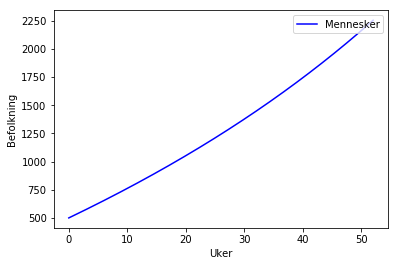

In [45]:
from pylab import*
from IPython.display import Image
from IPython.core.display import HTML 
#Tid og steg

N = 10000    #Antall ganger løkka skal kjøre
tid = 52  #Antall tid i uker
dt = tid/N    #Antall uker pr gang løkka kjører



#Konstanter

a = 0.02 #Fødselrate
c0 = 500 #Befolkningen til å starte med
t0 = 0 #Startstid
p = 0.269 #Innvandringsendringskonstanten

#Matriser

c = zeros(N)   #Matrise for befolkningen
cder = zeros(N)  #Matrise for endring i befolkningen
t = zeros(N)    #Matrise for tid

#Initialbetingelser 

c[0] = c0
t[0] = t0




#Eulers Metode

for i in range(N-1):
    if t[i]<52:
        u = 15-(t[i]*p) #Invandring
    else: 
        u = 1
    cder[i] = a*c[i]+u
    c[i+1] = c[i] + cder[i]*dt
    t[i+1] = t[i]+dt
    
#Plotting

plot(t,c,'-b', label = 'Mennesker')
legend(loc='upper right')
xlabel("Uker")
ylabel("Befolkning")
show()

### Eulers Metode

Vi kommer igjennom dette projektet til å bruke Eurlers metode gjentatte ganger, og derfor skal vi begynne med å gjennomgå teorien bak denne. Vi begynner med å fjerne grenseverdien fra definisjonen av den deriverte, og bytte ut h med dt, som er tidssteget ditt. Da får vi dette : 
<img src="https://raw.githubusercontent.com/SigurdKveine/Promod-Projekt-V-r-2019/master/Euler%201.PNG">
Vi ganger så med dt på begge sider, og får dette:
<img src="https://raw.githubusercontent.com/SigurdKveine/Promod-Projekt-V-r-2019/master/Formel2.png">
Ved så å flytte f(x+dt) for seg selv, kommer vi da til målet:
<img src="https://raw.githubusercontent.com/SigurdKveine/Promod-Projekt-V-r-2019/master/Euler%203.PNG">
Siden avstanden mellom hver verdi i matrisen C, er N, og dt er avhengi av N, blir det i løkka f(i+1) når vi skal se på den neste verdien

### Konklusjon

Vi kom fram til reproduksjonsraten ved å ta en gjennomsnittelig reproduksjonsrate i verden, som vi fant som 0,023. Vi satte denne noe ned, da man i et apokalyptisk samfunn ikke kan forvente en fødselsrate som er så høy. Når vi ser på denne økningen i mennesker, kan vi tydelig se at befolkningen øker veldig fort. Dette er fordi det ikke er noen begrensning for økningen, og heller ingen død med denne modellen. Dette gir modellen veldig mange begrensninger.

For å unngå et altfor høy økning i fremtidige oppgaver, gjorde vi slik at invandringen minker i løpet av tiden. Fra et logisk standpunkt vil vi etter hvert gå tom for mennesker rundt Alexandria som kan migrere. Dette løste vi ved å lage innvandringen til en funksjon av tiden, og vi bestemte oss for at vi ønsket at det skulle "bli slutt på mennesker" etter et år. Dermed lagde vi funksjonen u = 15-(t[i]*p), der p var en konstant vi satt ved å ta at ved t[i] = 52, skulle u være 1. Else delen er da for å forhindre at du får negativ innvandring, 

## Oppgave 2

Alexandria har ikke en ubegrenset mengde med ressurser og plass, så modellen vår er foreløpig litt unøyaktig. Vi innfører derfor
en bæreevne som er basert på hvor mye ressurser som fins i Alexandria, og som vil justere veksten av populasjonen med mennesker. 
Det er fortsatt bare innvandring og fødsler som påvirker veksten, murene i Alexandria holder fortsatt stand mot zombiene, og 
sykdom og alderdom finnes ikke.

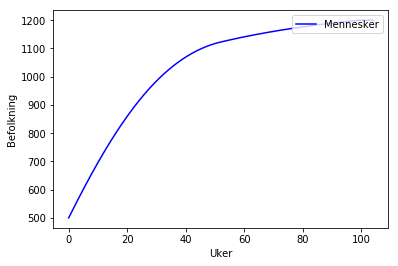

In [28]:
from pylab import*
#Tid og steg

N = 10000    #Antall ganger løkka skal kjøre
tid = 104   #Antall tid i uker 
dt = tid/N    #Antall uker pergang løkka kjører


#Konstanter

t0 = 0 #Startstid
a = 0.02 #Fødselrate
b = 1200 #Bæereevnen
p = 0.269 #Innvandringsendring konstant
c0 = 500 #Befolkningen til å starte med


#Matriser

c = zeros(N)   #Matrise for befolkningen
cder = zeros(N)  #Matrise for endring i befolkningen
t = zeros(N)    #Matrise for tid

#Initialbetingelser 

c[0] = c0
t[0] = t0

#Eulers Metode

for i in range(N-1):
    if t[i] < 52:
        u = 15-(t[i]*p) #Funksjon for innvandring
    else:
        u = 1 
    if c[i] < b: #Hindrer innvandring etter at bæreevnen er nådd.
        cder[i] = a*c[i]*(1-(c[i]/b))+u #Setter inn bæreevnen.
    else:
        cder[i] = a*c[i]*(1-(c[i]/b))
    c[i+1] = c[i] + cder[i]*dt
    t[i+1] = t[i]+dt
    
#Plotting

plot(t,c,'-b', label = 'Mennesker')
legend(loc='upper right')
xlabel("Uker")
ylabel("Befolkning")
show()

Populasjonsdynamikken vil straks endres på når man finner ut av at Alexandria ikke har nok resurser til å ta vare på uendelig mange mennesker. Disse resursene kommer i form av både plass, medisiner, og mat. Koden viser en "if" setning som med en gang vil stenge dørene for innvanding etter at bæreevnen er nådd.

Vi satt opp bæreevnen på 1200 fordi det virket som en logisk/realistisk grense på hvor mange som kan befinne seg i et lukket samfunn. Bæreevnen viste seg å passe ganske bra med den gitte tiden. Altså, etter ca. 2 år uten noen dødsfall, viser modellen at bæreevnen er nådd.

## Oppgave 3

I denne modellen finnes det også andre faktorer som vil begrense veksten til populasjonen. Inntil videre holder fortsatt muren seg sterk, så zombiene er ikke en faktor enda. Nå skal vi se på hvordan naturlig dødsfall påvirker populasjonen, og vil da se nærmere på hvordan dødsfall fra sykdom, alderdom og skader vil begrense veksten. Her går vi utifra at det er liten plass, og at sykdom derfor vil forekomme hyppigere. Samtidig vil det være naturlig å anta at det er liten tilgang på medisiner og leger, siden det jo er en apokalyptisk tilstand.

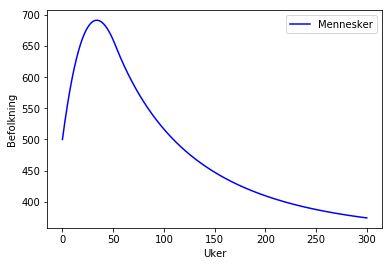

In [27]:

from pylab import*
#Tid og steg

N = 10000    #Antall ganger løkka skal kjøre
tid = 300 #Antall tid i uker
dt = tid/N    #Antall uker pr gang løkka kjører
t0 = 0 #Startstid

#Matriser

c = zeros(N)   #Matrise for befolkningen
cder = zeros(N)  #Matrise for endring i befolkningen
t = zeros(N)    #Matrise for tid

#Initialbetingelser 

c0 = 500 #Befolkningen til å starte med
c[0] = c0
t[0] = t0


#Konstanter

a = 0.02 #Fødselrate
b = 1200 #Bæereevnen
d =  0.017 #Dødsrate
p = 0.269 #Innvandringsendringskonstanten

#Eulers Metode

for i in range(N-1):
    if t[i]<52:
        u = 15-(t[i]*p) #Invandring
    else: 
        u = 1
    if c[i] < b:
        cder[i] = (a*c[i])*(1-(c[i]/b))+u - d*c[i]
    else:   
        cder[i] = (a*c[i])*(1-(c[i]/b)) - d*c[i]
    c[i+1] = c[i] + cder[i]*dt
    t[i+1] = t[i]+dt
    
#Plotting

plot(t,c,'-b', label = 'Mennesker')
legend(loc='upper right')
xlabel("Uker")
ylabel("Befolkning")
show()

Konklusjon
Vi fant en global dødsrate som var i overkant av 0,9%. Denne økte vi, da tilgangen til medisinsk hjelp i en apokalyptisk situasjon er kraftig begrenset og flere vil dermed dø av sykdom. Med dette i bakhodet satte vi dødsraten til 1,7%. Man ser på grafen her at befolkningen øker fram til antallet innvandrere blir så små at dødsraten matcher ut fødselsraten, før det går ned og stabiliserer seg rundt 350.

## Oppgave 4

Nå skal vi se på hvordan zombiepopulasjonen påvirker menneskepopulasjonen, hvis zombiene fungerer som rovdyr. Det vil si at menneskene ikke kan bli smittet, og siden zombiene hverken kan bli drept eller bli flere, vil zombiene forbli samme antall gjennom denne modellen. Dette er dårlig nytt for menneskene, siden de ikke har mulighet til å slå tilbake mot zombiene enda. 

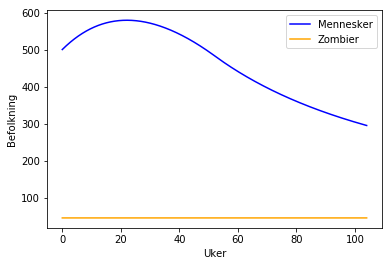

In [44]:
from pylab import*
#Tid og steg

N = 10000    #Antall ganger løkka skal kjøre
tid = 104 #Antall tid i uker
dt = tid/N    #Antall uker pr gang løkka kjører


#Konstanter

a = 0.02 #Fødselrate
b = 1200 #Bæereevnen
d =  0.017 #Dødsrate
p = 0.269 #Innvandringsendringskonstanten
g = 0 #Antall mennesker drept av zombier hver måned
f = 0.4 #Prosent av mennekser drept som blir til zombier
h = 0.0002 #Zombiemøtedrapskonstanten
t0 = 0 #Startstid
c0 = 500 #Befolkningen til å starte med
z0 = 45 #Antall zombier til å starte med


#Matriser

c = zeros(N)   #Matrise for befolkningen
cder = zeros(N)  #Matrise for endring i befolkningen
t = zeros(N)    #Matrise for tid
z = zeros(N)    #Matrise for antall zombier

#Initialbetingelser 

c[0] = c0
t[0] = t0
z[0] = z0 


#Eulers Metode

for i in range(N-1):
    if t[i]<52:
        u = 15-(t[i]*p) #Invandring
    else: 
        u = 1
    g = c[i]*z[i]*h  #Formel for antall mennesker drept
    if c[i] < b:
        cder[i] = (a*c[i])*(1-(c[i]/b))+u - d*c[i] - g
    else:   
        cder[i] = (a*c[i])*(1-(c[i]/b)) - d*c[i] - g
    c[i+1] = c[i] + cder[i]*dt
    t[i+1] = t[i]+dt
    z[i+1] = z[i]
    
#Plotting

plot(t,c, 'b', label = 'Mennesker')
plot(t,z, 'orange', label = 'Zombier')
legend(loc='upper right')
xlabel("Uker")
ylabel("Befolkning")
show()


Vi har her lagt inn muligheten for at menneskene som blir drept av zombier blir til mennesker. Vi har satt formelen for antall drept til
<img src="https://raw.githubusercontent.com/SigurdKveine/Promod-Projekt-V-r-2019/master/Formel%20til%20oppgave%205.PNG">
Vi prøde oss fram med ulike verdier for h, og kom fram til at 0,0002 var en fin verdi.Vi må til senere tilfeller være oppmerksommme på at hvis zombiene blir utryddet, trenger vi en spesifikk kode til dette, men siden zombiene enda ikke kan dø, kan vi ta denne problematikken senere. Denne konstanten er lagt inn i løkka, slik at den oppdateres for hver gang. Vi ser på grafen at mennesker stiger til de når et punkt hvor innvandringen blir lav nok, til at zombiene dreper flere enn det som fødes. Vi ser så at mennesker stabiliserer seg, på et punkt hvor menneskene klarer å produsere nok avkom til å holde arten stabil, tross død.

## Oppgave 5

I neste modell gjør vi det enda vanskeligere for menneskene ved at de har mulighet for å bli smittet om de blir bitt av zombiene. Dette vil bidra til å øke zombiepopulasjonen samtidig som den minsker menneskepopulasjonen. Når man møter en zombie blir man ikke nødvendigvis smittet, man kan også dø. Sannsynligheten for dette vil vi forklare i konklusjonen. 

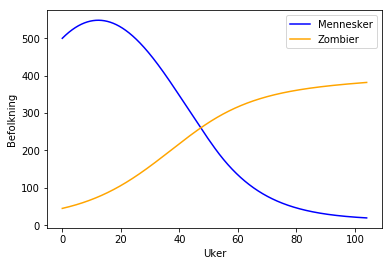

In [43]:
from pylab import*
#Tid og steg

N = 10000    #Antall ganger løkka skal kjøre
tid = 104 #Antall tid i uker
dt = tid/N    #Antall uker pr gang løkka kjører


#Konstanter

a = 0.02 #Fødselrate
b = 1200 #Bæereevnen
d =  0.017 #Dødsrate
p = 0.269 #Innvandringsendringskonstanten
g = 0 #Antall mennesker drept av zombier hver måned
f = 0.4 #Prosent av mennekser drept som blir til zombier
h = 0.0002 #Zombiemøtedrapskonstanten
t0 = 0 #Startstid
c0 = 500 #Befolkningen til å starte med
z0 = 45 #Antall zombier til å starte med


#Matriser

c = zeros(N)   #Matrise for befolkningen
cder = zeros(N)  #Matrise for endring i befolkningen
t = zeros(N)    #Matrise for tid
z = zeros(N)    #Matrise for antall zombier

#Initialbetingelser 

c[0] = c0
t[0] = t0
z[0] = z0 


#Eulers Metode

for i in range(N-1):
    if t[i]<52:
        u = 15-(t[i]*p) #Invandring
    else: 
        u = 1
    g = c[i]*z[i]*h  #Formel for antall mennesker drept
    if c[i] < b:
        cder[i] = (a*c[i])*(1-(c[i]/b))+u - d*c[i] - g
    else:   
        cder[i] = (a*c[i])*(1-(c[i]/b)) - d*c[i] - g
    c[i+1] = c[i] + cder[i]*dt
    z[i+1] = z[i] + g*f*dt
    t[i+1] = t[i]+dt
    
#Plotting

plot(t,c, 'b', label = 'Mennesker')
plot(t,z, 'orange', label = 'Zombier')
legend(loc='upper right')
xlabel("Uker")
ylabel("Befolkning")
show()


For å gjøre om fra at zombier bare dreper til at mennesker kan bli til zombier må vi bare gjennom noen få steg. Vi må først legge inn en konstant som sier noe om hvor mange prosent av de som blir drept som blir til Zombier selv, og dette satte vi til 40%, fordi zombiene også kan rive menneskene i stykker slik at de ikke kan bli til mennesker, eller mennesker kan ta livet av slektninger eller venner før de rekker å bli smittet hvis de blir bitt. Vi ser her at menneskene stiger til en punkt hvor innvandringen blir så liten at zombiene tar over, for så å gå ned og stabilisere seg. Siden zombiene ikke kan dø i denne modellen, ser vi en økningn gjennom hele modellen. Vi ser en begrensning meg dette, som vil fikses i den neste oppgaven.

## Oppgave 6

Nå har menneskene klart å skaffe seg våpen, slik at de kan slå tilbake mot zombiene. Dette vil forhåpentligvis gjøre det lettere for menneskene å overleve. For å summere opp er de faktorene som påvirker veksten til menneskene fødsler, innvandring, bæreevne, naturlig dødsfall og zombier som enten dreper eller smitter dem. For zombiene endres veksten av hvor mange mennsker de smitter og hvor mange av dem som blir drept av mennsker. Vi regner fortsatt med at zombiene ikke dør av andre årsaker enda.

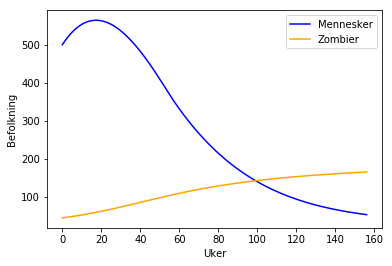

In [42]:

from pylab import*
#Tid og steg

N = 10000    #Antall ganger løkka skal kjøre
tid = 156 #Antall tid i uker
dt = tid/N    #Antall uker pr gang løkka kjører


#Konstanter

a = 0.02 #Fødselrate
b = 1200 #Bæereevnen
d =  0.017 #Dødsrate
p = 0.269 #Innvandringsendringskonstanten
g = 0 #Antall mennesker drept av zombier hver uke
k = 0 #Antall zombier drept av mennesker hver uke
f = 0.4 #Prosent av mennekser drept som blir til zombier
h = 0.0002 #Zombiemøtedrapskonstanten
j = 0.00005 #Menneskemøtedrapskonstant
t0 = 0 #Startstid
c0 = 500 #Befolkningen til å starte med
z0 = 45 #Antall zombier til å starte med


#Matriser

c = zeros(N)   #Matrise for befolkningen
cder = zeros(N)  #Matrise for endring i befolkningen
t = zeros(N)    #Matrise for tid
z = zeros(N)    #Matrise for antall zombier
zder = zeros(N) #Matrise for endring av zombier

#Initialbetingelser 

c[0] = c0
t[0] = t0
z[0] = z0 


#Eulers Metode

for i in range(N-1):
    if t[i]<52:
        u = 15-(t[i]*p) #Innvandring
    else: 
        u = 1
    g = c[i]*z[i]*h  #Formel for antall mennesker drept
    k = z[i]*c[i]*j #Formel for antall zombier drept
    if c[i] < b:
        cder[i] = (a*c[i])*(1-(c[i]/b))+u - d*c[i] - g
    else:   
        cder[i] = (a*c[i])*(1-(c[i]/b)) - d*c[i] - g
    zder[i] = (f*g) - k
    c[i+1] = c[i] + cder[i]*dt
    z[i+1] = z[i] + zder[i]*dt
    t[i+1] = t[i]+dt
    
#Plotting

plot(t,c, 'b', label = 'Mennesker')
plot(t,z, 'orange', label = 'Zombier')
legend(loc='upper right')
xlabel("Uker")
ylabel("Befolkning")
show()  

I oppgave 6 får menneskene endelig en sjansje til å slåss tilbake, derfor la vi til den deriverte av zombieantallet hvor også zombier kan bli drept av mennesker. Antall zombier som blir drept blir bestemt av en (j) konstant som bestemmer antall zombier drept av mennesker. (j) konstanten må være lavere enn (h) konstanten på grunn av det lave antallet zombier på starten. Du kan se på grafen at menneskene blir mye mindre i antall etter 2 år. Altså, det vil si at mennesker som kan slåss tilbake vil kunne holde tilbake tiden på når zombier blir flere, ikke overmanne zombiene generelt. Dette er muligens grunnet de flere faktorene som både trekker ned menneskebestanden og faktorene som trekker opp zombieantallet. I motsetning til andre råvdyr/byttedyr modeller, er ikke antall mennesker som produseres avhengig av antall zombier.

## Oppgave 7

I den siste modellen vil vi se på hva som skjer om Alexandria får forsterkninger av to nærliggende landsbyer: Kingdom og Hilltop. Forsterkninger vil komme i form av personer med våpen, våpen og medisiner. Personene vil bidra direkte med å øke menneske populasjonen, og sammen med våpnene vil de også bidra til å minske zombie populasjonen. Medisinene vil bidra til å redusere de naturlige dødsfallene.

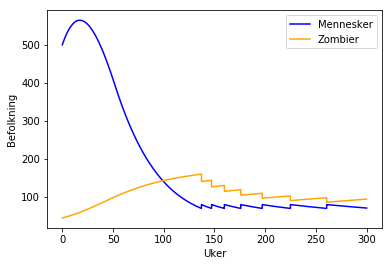

In [41]:
from pylab import*
#Tid og steg

N = 10000    #Antall ganger løkka skal kjøre
tid = 300 #Antall tid i uker
dt = tid/N    #Antall uker pr gang løkka kjører


#Konstanter

a = 0.02 #Fødselrate
b = 1200 #Bæereevnen
d =  0.017 #Dødsrate
p = 0.269 #Innvandringsendringskonstanten
g = 0 #Antall mennesker drept av zombier hver uke
k = 0 #Antall zombier drept av mennesker hver uke
f = 0.4 #Prosent av mennekser drept som blir til zombier
h = 0.0002 #Zombiemøtedrapskonstanten
j = 0.00005 #Menneskemøtedrapskonstant
m = 70 #Befolkninshjelp
t0 = 0 #Startstid
c0 = 500 #Befolkningen til å starte med
z0 = 45 #Antall zombier til å starte med



#Matriser

c = zeros(N)   #Matrise for befolkningen
cder = zeros(N)  #Matrise for endring i befolkningen
t = zeros(N)    #Matrise for tid
z = zeros(N)    #Matrise for antall zombier
zder = zeros(N) #Matrise for endring av zombier

#Initialbetingelser 

c[0] = c0
t[0] = t0
z[0] = z0 


#Eulers Metode

for i in range(N-1):
    if t[i]<52:
        u = 15-(t[i]*p) #Innvandring
    else: 
        u = 1
    g = c[i]*z[i]*h  #Formel for antall mennesker drept
    k = z[i]*c[i]*j #Formel for antall zombier drept
    if c[i] > b:
        cder[i] = (a*c[i])*(1-(c[i]/b)) - d*c[i] - g
    else:   
        cder[i] = (a*c[i])*(1-(c[i]/b))+u - d*c[i] - g
    zder[i] = (f*g) - k
    if c[i]<m:
        c[i+1] = c[i] + cder[i]*dt + 10
    else:
        c[i+1] = c[i] + cder[i]*dt
    z[i+1] = z[i] + zder[i]*dt
    t[i+1] = t[i]+dt
    if c[i]<m:
        d = 0.01     #Endrer noen konstanter når befolkningen går under 100 mennesker
        j = 0.05
    else:
        d = 0.017    #Stiller konstantene tilbake hvis de kommer over dette antallet
        j = 0.00005
    
#Plotting

plot(t,c, 'b', label = 'Mennesker')
plot(t,z, 'orange', label = 'Zombier')
legend(loc='upper right')
xlabel("Uker")
ylabel("Befolkning")
show()